In statistics,  Levene's test is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups.

Классический непараметрический критерий согласия Андерсона — Дарлинга  предназначен для проверки простых гипотез о принадлежности анализируемой выборки полностью известному закону (о согласии эмпирического распределения  и теоретического закона

Источник - https://www.kaggle.com/code/shreyasajal/let-s-infer-statistically-state-of-indian-birds#Long-term-Trend-(%)

Плотли в колабе


In [3]:
import plotly
plotly.io.renderers.default = 'colab'

In [4]:
!pip install chart_studio
!pip install openpyxl
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image
from scipy import stats
from scipy.stats import norm, skew #for some statistics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
data = pd.read_excel('State of Indias Birds - Essentials.xlsx', sheet_name = 'Information', engine = 'openpyxl')
data.head()

,Serial Number,Common Name (India Checklist),Scientific Name (India Checklist),IUCN Status,WLPA Schedule,Analysed Long-term,Analysed Current,Long-term Trend (%),Long-term Trend CI (%),Current Annual Change (%),Current Annual Change CI (%),"Distribution Range Size (units of 10,000 sq. km.)","Distribution Range Size CI (units of 10,000 sq. km.)",Long Term Status,Current Status,Distribution Status,Status of Conservation Concern,Assessed Primarily Based On,Migratory Status
0,1,Fulvous Whistling Duck,Dendrocygna bicolor,Least Concern,Schedule-I,NaN,X,NaN,NaN,-1.873458,11.421401,13.407499,0.0711,Data Deficient,Uncertain,Moderate,Low,Trends & Range Size,Resident
1,2,Lesser Whistling Duck,Dendrocygna javanica,Least Concern,Schedule-IV,X,X,4.607645,19.496768,-3.907999,2.727740,149.898761,0.0987,Stable,Moderate Decline,Very Large,Low,Trends & Range Size,Resident
2,3,Bar-headed Goose,Anser indicus,Least Concern,Schedule-IV,X,X,-13.399940,217.658129,-6.935407,38.946950,45.447258,0.0700,Uncertain,Uncertain,Large,Low,Trends & Range Size,Migratory-Local
3,4,Greylag Goose,Anser anser,Least Concern,Schedule-IV,X,X,-38.402762,34.943843,-3.091665,8.853505,24.569174,0.1045,Uncertain,Uncertain,Moderate,Low,Trends & Range Size,Migratory-Long-Distance
4,5,Comb Duck,Sarkidiornis melanotos,Least Concern,Schedule-IV,X,X,1.291713,31.154296,-6.018774,4.432597,81.233442,0.0836,Uncertain,Moderate Decline,Large,Moderate,Trends & Range Size,Resident


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial Number,867.0,434.000000,250.425638,1.000000,217.500000,434.000000,650.500000,867.000000
Long-term Trend (%),487.0,-23.771736,40.640144,-97.040887,-53.361035,-30.045127,-1.467697,171.255544
Long-term Trend CI (%),487.0,35.660908,35.405406,0.914415,15.724150,26.164983,42.704433,368.877213
Current Annual Change (%),677.0,-1.508480,10.239282,-24.033897,-5.989720,-2.535760,1.640885,191.156998
Current Annual Change CI (%),677.0,14.041841,21.119122,1.185877,4.787951,8.648848,16.217987,400.802847
"Distribution Range Size (units of 10,000 sq. km.)",856.0,35.951108,50.519018,0.000900,5.653592,13.659506,37.720139,224.354113
"Distribution Range Size CI (units of 10,000 sq. km.)",856.0,0.075573,0.035236,0.000000,0.059075,0.074500,0.090525,0.441700


### First Look- List of continuous and categorical features; data info

In [7]:
cont_features = [i for i in data.columns if data[i].nunique()>10]
cat_features=[i for i in data.columns if data[i].nunique()<=10]

In [8]:
cont_features

['Serial Number',
 'Common Name (India Checklist)',
 'Scientific Name (India Checklist)',
 'Long-term Trend (%)',
 'Long-term Trend CI (%)',
 'Current Annual Change (%)',
 'Current Annual Change CI (%)',
 'Distribution Range Size (units of 10,000 sq. km.)',
 'Distribution Range Size CI (units of 10,000 sq. km.)']

In [9]:
data['Common Name (India Checklist)'].value_counts()

Fulvous Whistling Duck       1
White-breasted Parrotbill    1
Yellow-bellied Prinia        1
Ashy Prinia                  1
Plain Prinia                 1
                            ..
Red-headed Trogon            1
Ward's Trogon                1
Common Hoopoe                1
Great Hornbill               1
Chestnut Munia               1
Name: Common Name (India Checklist), Length: 867, dtype: int64

In [10]:
cat_features

['IUCN Status',
 'WLPA Schedule',
 'Analysed Long-term',
 'Analysed Current',
 'Long Term Status',
 'Current Status',
 'Distribution Status',
 'Status of Conservation Concern',
 'Assessed Primarily Based On',
 'Migratory Status']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Serial Number                                         867 non-null    int64  
 1   Common Name (India Checklist)                         867 non-null    object 
 2   Scientific Name (India Checklist)                     867 non-null    object 
 3   IUCN Status                                           867 non-null    object 
 4   WLPA Schedule                                         867 non-null    object 
 5   Analysed Long-term                                    485 non-null    object 
 6   Analysed Current                                      675 non-null    object 
 7   Long-term Trend (%)                                   487 non-null    float64
 8   Long-term Trend CI (%)                                487 no

In [12]:
data = data.dropna()

### Normality Check- Continuous Features:

Test for Normality Of Features(A pre requirement for parametric hypothesis tests): We check whether our continuous features are normal/not through:



*   Boxplots(to check for outliers causing non normality)
*   Distplots
*   Q-Q PLOTS
*  SHAPIRO WILK TEST(tests against the null hypothesis that the distribution is normal)






Long-term Trend (%)
Mean long-term trend - percentage change in the index of abuncance in 2018 when compared to pre-year-2000

In [13]:
from plotly.offline import iplot
import plotly.graph_objs as go

In [14]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['Long-term Trend (%)'], name='Long-term Trend (%).)',
                marker_color = 'rgb(0, 0, 100)'))
fig.show(renderer="colab")


In [15]:
fig = ff.create_distplot([data['Long-term Trend (%)']],['Long-term Trend (%)'],bin_size=5,colors=['rgb(0, 0, 100)'])
iplot(fig, filename='Basic Distplot')

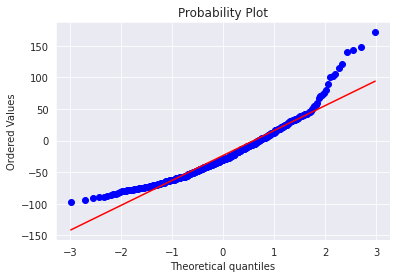

In [16]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Long-term Trend (%)'], plot=plt)
plt.show()

Shapiro Wilk Test

In [17]:
from scipy.stats import shapiro
import scipy.stats as stats
shapiro([data['Long-term Trend (%)']])

ShapiroResult(statistic=0.9309391379356384, pvalue=3.5751068582336523e-14)

Since the p value<0.05(significance level),the null hypothesis is rejected and we conclude that the distribution is non normal.

## Current Annual Change

In [18]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['Current Annual Change (%)'], name='Current Annual Change(%).)',
                marker_color = 'rgb(0, 0, 100)'))

Видим что есть жесткие аномалии

In [19]:
Q1 = data['Current Annual Change (%)'].quantile(0.25)
Q3 = data['Current Annual Change (%)'].quantile(0.75)

IQR = Q3 - Q1 

In [20]:
filter = (data['Current Annual Change (%)'] >= Q1 - 1.5 * IQR) & (data['Current Annual Change (%)'] <= Q3 + 1.5 *IQR)
df1=data.loc[filter]  

In [21]:
fig = ff.create_distplot([df1['Current Annual Change (%)']],['Current Annual Change (%)'],bin_size=5,colors=['rgb(0, 0, 100)'])
iplot(fig, filename='Basic Distplot')

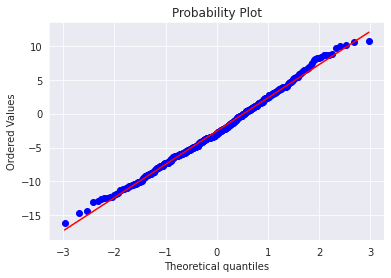

In [22]:
# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['Current Annual Change (%)'], plot=plt)
plt.show()

In [23]:
ntA = shapiro(df1['Current Annual Change (%)'])
ntA

ShapiroResult(statistic=0.9953537583351135, pvalue=0.17080441117286682)

Since the p value>0.05(significance level),we fail to reject the null hypothesis and conclude that the distribution is normal

### Тест Андерсона на принадлежность к распределению

In [24]:
from scipy.stats import anderson
result = anderson(df1['Current Annual Change (%)'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.552
15.000: 0.571, data looks normal (fail to reject H0)
10.000: 0.651, data looks normal (fail to reject H0)
5.000: 0.780, data looks normal (fail to reject H0)
2.500: 0.910, data looks normal (fail to reject H0)
1.000: 1.083, data looks normal (fail to reject H0)


## Distribution Range Size

Mean range size within India estimated at the resolution of occupied 25x25 km grid cells (625 sq. km.) during the last 5 years and presented in units of 10,000 sq. km

In [25]:
fig = go.Figure()

layout = go.Layout(template= "plotly_dark")
fig.add_trace(go.Box(y=data['Distribution Range Size (units of 10,000 sq. km.)'], name='Distribution Range Size(units of 10,000 sq. km.)',
                marker_color = 'rgb(0, 0, 100)'))

fig.show()

In [26]:
Q1 = data['Current Annual Change (%)'].quantile(0.25)
Q3 = data['Current Annual Change (%)'].quantile(0.75)

IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data['Current Annual Change (%)'] >= Q1 - 1.5 * IQR) & (data['Current Annual Change (%)'] <= Q3 + 1.5 *IQR)
df2=data.loc[filter]

In [27]:
fig = ff.create_distplot([df2['Distribution Range Size (units of 10,000 sq. km.)']],['Distribution Range Size (units of 10,000 sq. km.)'],bin_size=5,colors=['rgb(0, 0, 100)'])

iplot(fig, filename='Basic Distplot')

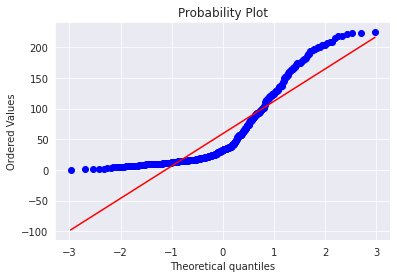

In [28]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df2['Distribution Range Size (units of 10,000 sq. km.)'], plot=plt)
plt.show()

In [29]:
from scipy.stats import shapiro
import scipy.stats as stats
shapiro(df2['Distribution Range Size (units of 10,000 sq. km.)'])

ShapiroResult(statistic=0.8213796615600586, pvalue=1.490959606424451e-22)

INFERENCE:

Out of the 3 continuous features we were interested in,only Current Annual Change (%) has an overall normal distribution.Rest of them show deviations from normality in their distributions as we saw above.So,we will be performing the parametric statistical tests on the Current Annual Change (%) feature only.
For the non normal features, we can perform some non parametric statistical test that we will see further.

In [30]:
cat_features

['IUCN Status',
 'WLPA Schedule',
 'Analysed Long-term',
 'Analysed Current',
 'Long Term Status',
 'Current Status',
 'Distribution Status',
 'Status of Conservation Concern',
 'Assessed Primarily Based On',
 'Migratory Status']

In [31]:
data['IUCN Status'].unique()

array(['Least Concern', 'Vulnerable', 'Near Threatened', 'Endangered',
       'Critically Endangered'], dtype=object)

## Confidence Intervals

1.What proportion of the Bird Population has a higher chance of being Critically Endangered?

Let's obtain a 95 pct confidence interval for the population proportion of critically endangered birds.

In [32]:
df = df1
print(df['IUCN Status'].value_counts())
n = df.shape[0]

Least Concern            438
Near Threatened           21
Vulnerable                10
Endangered                 3
Critically Endangered      1
Name: IUCN Status, dtype: int64


In [33]:
Critic_end = df['IUCN Status'].value_counts().loc['Critically Endangered']

print("\nTotal Observation ==>",n,"\t",
      "Number of Critically Endangered Birds in our sample data ==> ",Critic_end,"\n")


Total Observation ==> 473 	 Number of Critically Endangered Birds in our sample data ==>  1 



In [34]:
import statsmodels.api as sm
print("\n95% Confidence interval with statsmodels library ==>",
      sm.stats.proportion_confint(Critic_end, n),"\n")


95% Confidence interval with statsmodels library ==> (0.0, 0.006253469439303978) 



Interpretation of the result:

With 95% confidence, the population proportion of critically endangered birds is estimated to be between 0% - 0.0062%.

3.What is the average Current Annual Change (%) level for birds which are nearly threatened ?

Our task:To obtain a 95% confidence interval around the sample average Current Annual Change (%) that will contain the population average Current Annual Change (%) in 95% of the samplings.

In [35]:
df_near_threatened=df[df['IUCN Status']=='Near Threatened']
print("\n95% C.I. with statsmodels library ==>",sm.stats.DescrStatsW(df_near_threatened['Current Annual Change (%)']).zconfint_mean())


95% C.I. with statsmodels library ==> (-7.045391069166767, -3.4893057111189485)


Interpretation of the result:

With 95% confidence, the population average Current Annual Change (%) level for birds which are nearly threatened is estimated to be between -7.04 and -3.48

In [36]:
import seaborn as sns
sns.set()

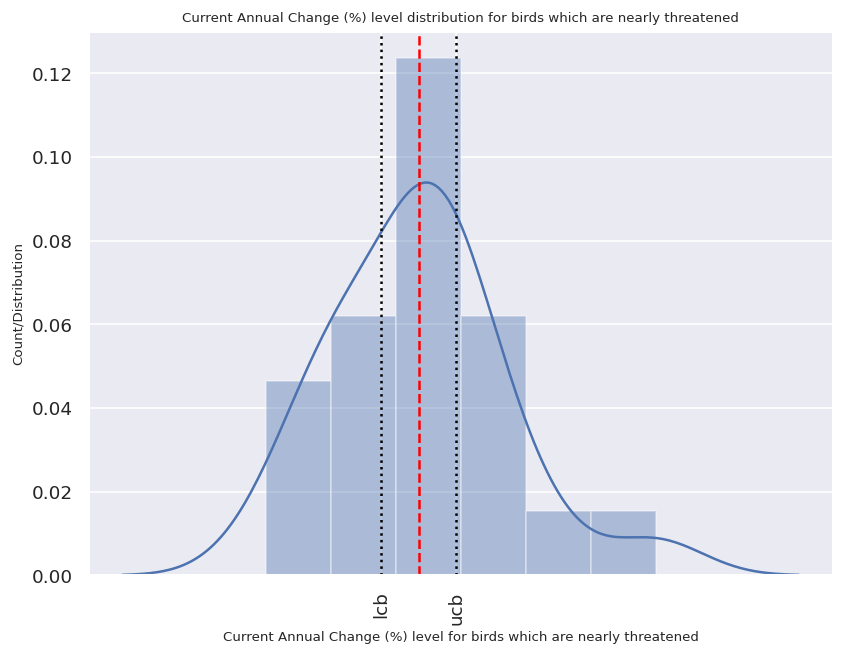

In [37]:
plt.figure(dpi=120,figsize=(8,6))
sns.distplot(df_near_threatened['Current Annual Change (%)'])

plt.axvline(x=-7.045391069166767,color = 'black',ls=':')
plt.axvline(x=-3.4893057111189485,color = 'black',ls=':')
plt.axvline(x=df_near_threatened['Current Annual Change (%)'].mean(),color='red',ls='--')


plt.xticks([-7.045391069166767, -3.4893057111189485], ['lcb', 'ucb'], rotation = 90);

plt.xlabel('Current Annual Change (%) level for birds which are nearly threatened',fontdict={'fontsize':8})
plt.ylabel('Count/Distribution',fontdict={'fontsize':8})
plt.title('Current Annual Change (%) level distribution for birds which are nearly threatened',fontdict={'fontsize':8}) 
plt.show()

## PARAMETRIC STATISTICAL TEST

In [38]:
data.groupby('IUCN Status').mean()

,Serial Number,Long-term Trend (%),Long-term Trend CI (%),Current Annual Change (%),Current Annual Change CI (%),"Distribution Range Size (units of 10,000 sq. km.)","Distribution Range Size CI (units of 10,000 sq. km.)"
IUCN Status,,,,,,,
Critically Endangered,244.666667,-89.413309,4.934552,-15.272417,4.304730,22.193610,0.071400
Endangered,360.250000,-51.776365,50.103704,-0.334582,25.282134,24.218696,0.058875
Least Concern,416.541573,-23.753446,34.124627,-1.667052,9.251352,60.155572,0.077820
Near Threatened,246.454545,-8.222303,56.436039,-3.529338,8.600533,45.030440,0.072736
Vulnerable,292.363636,-24.091821,61.605486,-5.379314,9.142232,36.294924,0.070464


**We understand that averages can be distorted by variations. So let's look at between-group differences.**

### Hypothetis test 1. IUCN Status. 1-way ANOVA

**Important assumption** - vairiances for groups are the same

In [39]:
df.columns=['Serial Number', 'Common Name (India Checklist)',
       'Scientific Name (India Checklist)', 'iucn_status', 'WLPA Schedule',
       'Analysed Long-term', 'Analysed Current', 'Long-term Trend (%)',
       'Long-term Trend CI (%)', 'annual_change',
       'Current Annual Change CI (%)',
       'Distribution Range Size (units of 10,000 sq. km.)',
       'Distribution Range Size CI (units of 10,000 sq. km.)',
       'Long Term Status', 'Current Status', 'dist_status',
       'Status of Conservation Concern', 'Assessed Primarily Based On',
       'mig_status']

In [40]:
temp_df = df['iucn_status'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(x = temp_df['index'],
                y = temp_df['iucn_status'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'IUCN STATUS DISTRIBUTION' , xaxis = dict(title = 'IUCN STATUS'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [41]:
df['iucn_status'].unique()

array(['Least Concern', 'Vulnerable', 'Near Threatened', 'Endangered',
       'Critically Endangered'], dtype=object)

In [42]:
df_near_threatened=df[df['iucn_status']=='Near Threatened']
df_least_concern=df[df['iucn_status']=='Least Concern']
df_vul=df[df['iucn_status']=='Vulnerable']
df_end=df[df['iucn_status']=='Endangered']
df_critic_end=df[df['iucn_status']=='Critically Endangered']

### LEVENE TEST - assessing the equality of variances for a variables calculated for 2 or more groups

In [43]:
leveneTest = stats.levene(df_least_concern['annual_change'], df_vul['annual_change'],df_end['annual_change'],df_critic_end['annual_change'],df_near_threatened['annual_change'])
leveneTest

LeveneResult(statistic=1.3505474772322275, pvalue=0.2502340347075567)

P-value more 0.05. Hence we fail to reject null hypothesis. This implies that groups have equal variances.

### ANOVA Hypotheses

Null Hypothesis (H0) — All IUCN Status are equal in terms of average Average Annual Change(%).
Alternative Hypothesis (HA) — Atleast one IUCN status group has significantly different Average Annual Change(%).

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('annual_change ~ iucn_status',data=df).fit()
table = sm.stats.anova_lm(lm)
print(table)

                df        sum_sq    mean_sq         F   PR(>F)
iucn_status    4.0    293.680227  73.420057  3.129478  0.01474
Residual     468.0  10979.654915  23.460801       NaN      NaN


In these results, the null hypothesis states that the mean Annual Change of all the IUCN status are equal. Because the p-value is 0.01474, which is less than the significance level of 0.05, we can reject the null hypothesis and conclude that at least one of the IUCN groups has significantly different average annual change(%).

POST HOC TEST

Post hoc tests are an integral part of ANOVA. When we use ANOVA to test the equality of at least three group means, statistically significant results indicate that not all of the group means are equal. However, ANOVA results do not identify which particular differences between pairs of means are significant. Hence,we use post hoc tests to explore differences between multiple group means.

I will be using the TUKEY TEST as the post hoc test in our example.It will help identify the groups that have significantly different average annual change(%)

### TUKEY TEST:
in these results, the confidence intervals indicate the following:

The confidence interval for the difference between the means the two respective groups is provided. 

If this range does not include zero, it indicates that the difference is statistically significant.


If the confidence intervals for the pairs of means include zero, which indicates that the differences are not statistically significant. Or by just looking at the p value:

We can simply compare the adjusted p-values to our significance level. When adjusted p-values are less than the significance level, the difference between those group means is statistically significant.

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['annual_change'], groups=df['iucn_status'], alpha=0.05)
print(m_comp)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
        group1             group2     meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------
Critically Endangered      Endangered   3.6244  0.967 -11.6916 18.9403  False
Critically Endangered   Least Concern   7.9825 0.4686  -5.2966 21.2617  False
Critically Endangered Near Threatened   5.0849 0.8435  -8.4913  18.661  False
Critically Endangered      Vulnerable   6.7386 0.6748  -7.1728   20.65  False
           Endangered   Least Concern   4.3582 0.5284   -3.326 12.0423  False
           Endangered Near Threatened   1.4605 0.9884  -6.7262  9.6472  False
           Endangered      Vulnerable   3.1142 0.8657  -5.6172 11.8457  False
        Least Concern Near Threatened  -2.8976 0.0588  -5.8607  0.0654  False
        Least Concern      Vulnerable  -1.2439 0.9296   -5.486  2.9981  False
      Near Threatened      Vulnerable   1.6537 0.9011  -3.4425  

Here, all the confidence intervals include zero,and the adjusted p-values >0.05 for all the group pairs.Hence,this is contaradicting what we proved through the Anova test that atleast one pair has significantly different mean Annual Change(%). We can solve the problem by relaxing our alpha value in the Tukey test.It is possible that the difference exists but at higher alpha.

In [46]:
m_comp = pairwise_tukeyhsd(endog=df['annual_change'], groups=df['iucn_status'], alpha=0.06)
print(m_comp)

            Multiple Comparison of Means - Tukey HSD, FWER=0.06             
        group1             group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
Critically Endangered      Endangered   3.6244  0.967  -11.31 18.5587  False
Critically Endangered   Least Concern   7.9825 0.4686 -4.9657 20.9308  False
Critically Endangered Near Threatened   5.0849 0.8435  -8.153 18.3227  False
Critically Endangered      Vulnerable   6.7386 0.6748 -6.8262 20.3033  False
           Endangered   Least Concern   4.3582 0.5284 -3.1345 11.8509  False
           Endangered Near Threatened   1.4605 0.9884 -6.5222  9.4432  False
           Endangered      Vulnerable   3.1142 0.8657 -5.3997 11.6281  False
        Least Concern Near Threatened  -2.8976 0.0588 -5.7868 -0.0085   True
        Least Concern      Vulnerable  -1.2439 0.9296 -5.3803  2.8924  False
      Near Threatened      Vulnerable   1.6537 0.9011 -3.3155  6.6229  False

The species with IUCN Status:Least Concerned and Near Threatened don't have 0 in the confidence interval now,which indicates that the difference between Annual change(%) of the two groups is statistically significant.Near threatened groups see higher Average Annual Change than Least concerned.

Now we get a significant outcome.We can report it as not significant at 0.05, but a significant difference is present at alpha = 0.06.

## Hypothesis Test 2: MIGRATORY STATUS

Question: Is there any difference between Migratory Status when considering Annual Change(%)?

In [47]:
temp_df = df['mig_status'].value_counts().reset_index()

In [48]:
# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['mig_status'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "presentation",title = 'MIGRATORY STATUS DISTRIBUTION' , 
                   xaxis = dict(title = 'MIGRATORY STATUS'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [49]:
df['mig_status'].unique()

array(['Resident', 'Migratory-Local', 'Migratory-Long-Distance'],
      dtype=object)

In [50]:
df_res=df[df['mig_status']=='Resident']
df_migratory_local=df[df['mig_status']=='Migratory-Local']
df_migratory_ld=df[df['mig_status']=='Migratory-Long-Distance']

In [51]:
leveneTest = stats.levene(df_res['annual_change'], df_migratory_local['annual_change'],df_migratory_ld['annual_change'])
leveneTest

LeveneResult(statistic=0.17430361029005226, pvalue=0.8400960905139632)

Variances are the same. We can proceed to One-Way Anova.

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('annual_change ~ mig_status',data=df).fit()
table = sm.stats.anova_lm(lm)
print(table)

               df        sum_sq    mean_sq        F    PR(>F)
mig_status    2.0     77.449811  38.724906  1.62566  0.197886
Residual    470.0  11195.885331  23.821033      NaN       NaN


P-value in One-Way Anova is more than 0.05. That implies that all mig.status are equal in terms of variable given - Average Annual Change.

### Hypothesis Test 3: DISTRIBUTION STATUS

In [53]:
temp_df = df['dist_status'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['dist_status'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "presentation",title = 'DISTRIBUTION Status' , xaxis = dict(title = 'DISTRIBUTION STATUS'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [54]:
df['dist_status'].unique()

array(['Very Large', 'Large', 'Moderate', 'Restricted', 'Very Restricted'],
      dtype=object)

In [55]:
df_1=df[df['dist_status']=='Very Large']
df_2=df[df['dist_status']=='Large']
df_3=df[df['dist_status']=='Moderate']
df_4=df[df['dist_status']=='Restricted']
df_5=df[df['dist_status']=='Very Restricted']

In [56]:
leveneTest = stats.levene(df_1['annual_change'],df_2['annual_change'],df_3['annual_change'],df_4['annual_change'],df_5['annual_change'])
leveneTest

LeveneResult(statistic=7.095406690182643, pvalue=1.4941623960675008e-05)

We see that p-value is very small. Hence we cannot proced with classis Anova as the variances are unequal.

Alternative - Welch's ANOVA.

### Welch’s ANOVA

ANOVA Hypotheses




*   Null Hypothesis  (H0) — All Distribution status are equal in terms of average Average Annual Change(%).
*   Alternative Hypothesis (HA) — Atleast one Distribution status group has significantly different Average Annual Change(%).






In [57]:
#!pip install pingouin

In [58]:
from pingouin import welch_anova, read_dataset

aov = welch_anova(dv='annual_change', between='dist_status', data=df)
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,dist_status,4,38.468588,1.28104,0.294282,0.01261


The mean Annual Change of all the Distribution status are equal. Because the p-value is 0.294282, which is more than the significance level of 0.05, we fail to reject the null hypothesis and conclude that: All Distribution Status are equal in terms of Average Annual Change(%).